In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Laptop
# csv_file_path = r'C:\Users\mrwoo\OneDrive\Desktop\SA_Interview\allservicecalls.csv'

#Server
csv_file_path = "/home/mrwoo/Documents/all_331_transformed.csv"

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
df

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,Report Starting Date,Report Ending Date,LATITUDE,LONGITUDE
0,Traffic Signals and Signs,1014001765,11/3/2017,9/22/2021,2023-03-16,YES,Public Works,Signals,Signal Timing Modification By Engineer,Closed,Constituent Call,PATRON and POTEET JDTN FY,4,3/2/2023,3/2/2024,29.338427,-98.550563
1,Solid Waste Services,1014303843,3/7/2018,3/16/2018,2023-03-08,YES,Solid Waste Management,Waste Collection,Additional Cart Request,Closed,Constituent Call,"1819 POPLAR ST W, San Antonio, 78207",1,3/2/2023,3/2/2024,29.440466,-98.519462
2,Traffic Signals and Signs,1014504120,5/11/2018,10/31/2018,2023-03-16,YES,Public Works,Traffic Engineering Design,Traffic Signal New Request,Closed,Constituent Call,HILDEBRAND E and NEW BRNFLS N,2,3/2/2023,3/2/2024,29.465814,-98.460859
3,Traffic Signals and Signs,1014549690,5/27/2018,11/15/2018,2023-03-16,YES,Public Works,Traffic Engineering Design,Traffic Signal New Request,Closed,Constituent Call,PERRIN BEITEL and SUNSHADOW ST,10,3/2/2023,3/2/2024,29.523482,-98.410947
4,Solid Waste Services,1014569491,6/3/2018,6/11/2018,NaN,YES,Solid Waste Management,Waste Collection,Damaged Cart,Open,Constituent Call,"220 BROADWAY, San Antonio, 78205",1,3/2/2023,3/2/2024,29.428094,-98.487158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606056,Animals,1019442050,3/1/2024,3/11/2024,NaN,NO,Animal Care Services,Field Operations,Animals(Public Nuisance),Open,Constituent Call,"319 AMBERDALE OAK, SAN ANTONIO, 78249",8,3/2/2023,3/2/2024,29.575311,-98.629121
606057,Animals,1019442051,3/1/2024,3/11/2024,NaN,NO,Animal Care Services,Field Operations,Animals(Public Nuisance),Open,Constituent Call,"11631 HIDDEN TERRACE, UBC, 78245",0,3/2/2023,3/2/2024,29.409398,-98.723522
606058,Animals,1019442052,3/1/2024,3/2/2024,2024-03-01,NO,Animal Care Services,Field Operations,Third Shift,Closed,Constituent Call,"55 CONSUELO, SAN ANTONIO, 78228",5,3/2/2023,3/2/2024,29.441727,-98.582815
606059,Animals,1019442053,3/1/2024,3/2/2024,NaN,NO,Animal Care Services,Field Operations,Third Shift,Open,Constituent Call,"7950 MEADOW STAR, SAN ANTONIO, 78227",6,3/2/2023,3/2/2024,29.420643,-98.644207


In [23]:
df.columns

Index(['Category', 'CASEID', 'OPENEDDATETIME', 'SLA_Date', 'CLOSEDDATETIME',
       'Late (Yes/No)', 'Dept', 'REASONNAME', 'TYPENAME', 'CaseStatus',
       'SourceID', 'OBJECTDESC', 'Council District', 'Report Starting Date',
       'Report Ending Date', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [3]:
# Convert 'OPENEDDATETIME' and 'CLOSEDDATETIME' columns to datetime objects
df['OPENEDDATETIME'] = pd.to_datetime(df['OPENEDDATETIME'], errors='coerce')
df['CLOSEDDATETIME'] = pd.to_datetime(df['CLOSEDDATETIME'], errors='coerce')

# Calculate the resolution time
df['ResolutionTime'] = df['CLOSEDDATETIME'] - df['OPENEDDATETIME']

# If you want the resolution time in a specific format (e.g., days), you can extract it
# For example, to extract resolution time in days:
df['ResolutionTimeDays'] = df['ResolutionTime'].dt.days

# Print the DataFrame to see the new column
df



,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,Report Starting Date,Report Ending Date,LATITUDE,LONGITUDE,ResolutionTime,ResolutionTimeDays
0,Traffic Signals and Signs,1014001765,2017-11-03,9/22/2021,2023-03-16,YES,Public Works,Signals,Signal Timing Modification By Engineer,Closed,Constituent Call,PATRON and POTEET JDTN FY,4,3/2/2023,3/2/2024,29.338427,-98.550563,1959 days,1959.0
1,Solid Waste Services,1014303843,2018-03-07,3/16/2018,2023-03-08,YES,Solid Waste Management,Waste Collection,Additional Cart Request,Closed,Constituent Call,"1819 POPLAR ST W, San Antonio, 78207",1,3/2/2023,3/2/2024,29.440466,-98.519462,1827 days,1827.0
2,Traffic Signals and Signs,1014504120,2018-05-11,10/31/2018,2023-03-16,YES,Public Works,Traffic Engineering Design,Traffic Signal New Request,Closed,Constituent Call,HILDEBRAND E and NEW BRNFLS N,2,3/2/2023,3/2/2024,29.465814,-98.460859,1770 days,1770.0
3,Traffic Signals and Signs,1014549690,2018-05-27,11/15/2018,2023-03-16,YES,Public Works,Traffic Engineering Design,Traffic Signal New Request,Closed,Constituent Call,PERRIN BEITEL and SUNSHADOW ST,10,3/2/2023,3/2/2024,29.523482,-98.410947,1754 days,1754.0
4,Solid Waste Services,1014569491,2018-06-03,6/11/2018,NaT,YES,Solid Waste Management,Waste Collection,Damaged Cart,Open,Constituent Call,"220 BROADWAY, San Antonio, 78205",1,3/2/2023,3/2/2024,29.428094,-98.487158,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606056,Animals,1019442050,2024-03-01,3/11/2024,NaT,NO,Animal Care Services,Field Operations,Animals(Public Nuisance),Open,Constituent Call,"319 AMBERDALE OAK, SAN ANTONIO, 78249",8,3/2/2023,3/2/2024,29.575311,-98.629121,NaT,NaN
606057,Animals,1019442051,2024-03-01,3/11/2024,NaT,NO,Animal Care Services,Field Operations,Animals(Public Nuisance),Open,Constituent Call,"11631 HIDDEN TERRACE, UBC, 78245",0,3/2/2023,3/2/2024,29.409398,-98.723522,NaT,NaN
606058,Animals,1019442052,2024-03-01,3/2/2024,2024-03-01,NO,Animal Care Services,Field Operations,Third Shift,Closed,Constituent Call,"55 CONSUELO, SAN ANTONIO, 78228",5,3/2/2023,3/2/2024,29.441727,-98.582815,0 days,0.0
606059,Animals,1019442053,2024-03-01,3/2/2024,NaT,NO,Animal Care Services,Field Operations,Third Shift,Open,Constituent Call,"7950 MEADOW STAR, SAN ANTONIO, 78227",6,3/2/2023,3/2/2024,29.420643,-98.644207,NaT,NaN


In [15]:
# Calculate average resolution time excluding NaN values
average_resolution_time = df['ResolutionTime'].mean()

# Count the number of cases still open (NaN values in 'ResolutionTime' column)
cases_still_open = df['ResolutionTime'].isna().sum()

print("Average resolution time Entire 311 Data Set (excluding cases still open):", average_resolution_time)
print("Number of cases still open:", cases_still_open)


Average resolution time Entire 311 Data Set (excluding cases still open): 24 days 01:33:06.929547900
Number of cases still open: 57220


In [5]:
# Create a new DataFrame with rows where 'REASONNAME' is 'Customer Service'
customer_service_df = df[df['REASONNAME'] == 'Customer Service'].copy()
customer_service_df


,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,Report Starting Date,Report Ending Date,LATITUDE,LONGITUDE,ResolutionTime,ResolutionTimeDays
580,Information,1015994295,2019-12-30,1/9/2020,NaT,YES,Animal Care Services,Customer Service,Customer Service(Complaint),Open,Constituent Call,"2515 TAMPICO ST, SAN ANTONIO, 78207",5,3/2/2023,3/2/2024,29.416084,-98.533790,NaT,NaN
609,Information,1015995412,2020-01-01,1/9/2020,NaT,YES,Animal Care Services,Customer Service,Customer Service(Complaint),Open,Constituent Call,"317 SPRUCE ST, SAN ANTONIO, 78203",2,3/2/2023,3/2/2024,29.412663,-98.471241,NaT,NaN
785,Dockless Vehicle,1016009388,2020-01-12,1/13/2020,2023-10-18,YES,311,Customer Service,Dockless Vehicle(High Priority),Closed,311 Mobile App,"245 LOSOYA ST, SAN ANTONIO, 78205",1,3/2/2023,3/2/2024,29.424238,-98.487894,1375 days,1375.0
786,Dockless Vehicle,1016009389,2020-01-12,1/13/2020,2023-10-18,YES,311,Customer Service,Dockless Vehicle(High Priority),Closed,311 Mobile App,"106 RIVERWALK, SAN ANTONIO, 78205",1,3/2/2023,3/2/2024,29.424969,-98.491980,1375 days,1375.0
794,Dockless Vehicle,1016009620,2020-01-12,1/13/2020,2023-10-18,YES,311,Customer Service,Dockless Vehicle(High Priority),Closed,311 Mobile App,"104 N ST MARYS, SAN ANTONIO, 78205",1,3/2/2023,3/2/2024,29.424741,-98.491265,1375 days,1375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604962,Information,1019440376,2024-03-01,3/8/2024,NaT,NO,Solid Waste Management,Customer Service,Customer Service(Complaint),Open,Constituent Call,E VESTAL PLACE and PLEASANTON RD,3,3/2/2023,3/2/2024,29.346639,-98.503870,NaT,NaN
605416,Information,1019441122,2024-03-01,7/25/2024,NaT,NO,Public Works,Customer Service,Customer Service(Complaint),Open,Constituent Call,FM 78 and N FOSTER RD,2,3/2/2023,3/2/2024,29.480195,-98.361040,NaT,NaN
605485,Dockless Vehicle,1019441237,2024-03-01,3/1/2024,2024-03-01,NO,311,Customer Service,Dockless Vehicle,Closed,311 Mobile App,"306 W MARKET ST, SAN ANTONIO, 78205",1,3/2/2023,3/2/2024,29.423076,-98.489778,0 days,0.0
605719,Information,1019441572,2024-03-01,3/8/2024,NaT,NO,311,Customer Service,Customer Service(Complaint),Open,Constituent Call,"315 S SANTA ROSA, SAN ANTONIO, 78207",1,3/2/2023,3/2/2024,29.422399,-98.499061,NaT,NaN


In [13]:
# Calculate average resolution time excluding NaN values
average_resolution_time = customer_service_df['ResolutionTime'].mean()

# Count the number of cases still open (NaN values in 'ResolutionTime' column)
cases_still_open = customer_service_df['ResolutionTime'].isna().sum()

print("Average resolution time - Customer Service (excluding cases still open):", average_resolution_time)
print("Number of cases still open:", cases_still_open)

Average resolution time - Customer Service (excluding cases still open): 355 days 22:46:49.081383164
Number of cases still open: 1788


In [12]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Filter the DataFrame where 'REASONNAME' is 'Customer Service'
customer_service_df = df[df['REASONNAME'] == 'Customer Service'].copy()

# Convert 'OPENEDDATETIME' column to datetime format
customer_service_df['OPENEDDATETIME'] = pd.to_datetime(customer_service_df['OPENEDDATETIME'], errors='coerce')

# Group by year and count occurrences
yearly_counts = customer_service_df.groupby(customer_service_df['OPENEDDATETIME'].dt.year).size()

# Create a DataFrame to display the counts
yearly_counts_df = pd.DataFrame(yearly_counts, columns=['Count'])

# Fill in missing years with zero counts
for year in range(2017, 2025):
    if year not in yearly_counts_df.index:
        yearly_counts_df.loc[year] = 0

# Sort the DataFrame by index (year)
yearly_counts_df.sort_index(inplace=True)

print(yearly_counts_df)





                Count
OPENEDDATETIME       
2017                0
2018                0
2019                1
2020              770
2021             1528
2022             1210
2023             3531
2024              474


In [28]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Filter the DataFrame where 'REASONNAME' is 'Customer Service' and 'Category' is 'Dockless Vehicle'
filtered_df = df[(df['REASONNAME'] == 'Customer Service') & (df['Category'] == 'Dockless Vehicle')].copy()

# Convert 'OPENEDDATETIME' column to datetime format
filtered_df['OPENEDDATETIME'] = pd.to_datetime(filtered_df['OPENEDDATETIME'], errors='coerce')

# Group by year and count occurrences
yearly_counts = filtered_df.groupby(filtered_df['OPENEDDATETIME'].dt.year).size()

# Create a DataFrame to display the counts
yearly_counts_df = pd.DataFrame(yearly_counts, columns=['Count'])

# Fill in missing years with zero counts
for year in range(2017, 2025):
    if year not in yearly_counts_df.index:
        yearly_counts_df.loc[year] = 0

# Sort the DataFrame by index (year)
yearly_counts_df.sort_index(inplace=True)

print(yearly_counts_df)


                Count
OPENEDDATETIME       
2017                0
2018                0
2019                0
2020              484
2021              785
2022              618
2023              564
2024               58


In [29]:
# Calculate average resolution time excluding NaN values for 'Dockless Vehicle' category
average_resolution_time = filtered_df['ResolutionTime'].mean()

# Count the number of cases still open (NaN values in 'ResolutionTime' column) for 'Dockless Vehicle' category
cases_still_open = filtered_df['ResolutionTime'].isna().sum()

print("Average resolution time - Customer Service (Dockless Vehicle category, excluding cases still open):", average_resolution_time)
print("Number of cases still open (Dockless Vehicle category):", cases_still_open)


Average resolution time - Customer Service (Dockless Vehicle category, excluding cases still open): 669 days 12:32:15.388409368
Number of cases still open (Dockless Vehicle category): 76


In [8]:
customer_service_df['TYPENAME'].value_counts()

TYPENAME
Customer Service(Complaint)        4603
Dockless Vehicle                   1438
Dockless Vehicle(High Priority)    1071
Customer Service(Compliment)        402
Name: count, dtype: int64

/tmp/ipykernel_58698/2374653716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_percentage.index, y=value_counts_percentage.values, palette="viridis")


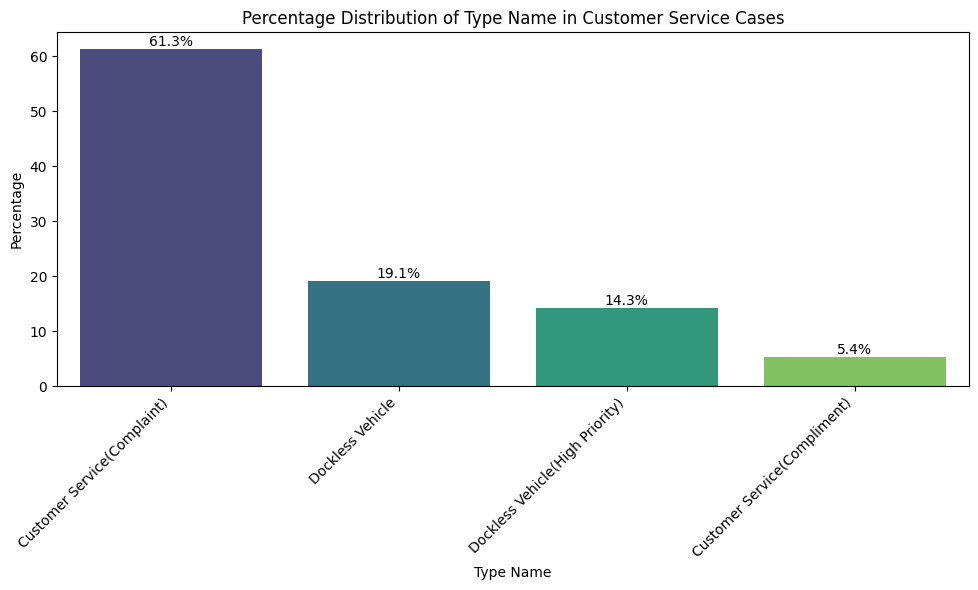

In [16]:

# Calculate value counts as percentages
value_counts_percentage = customer_service_df['TYPENAME'].value_counts(normalize=True) * 100

# Create a bar plot with custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts_percentage.index, y=value_counts_percentage.values, palette="viridis")

# Annotate each bar with its corresponding percentage value
for index, value in enumerate(value_counts_percentage):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center')

plt.xlabel('Type Name')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Type Name in Customer Service Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



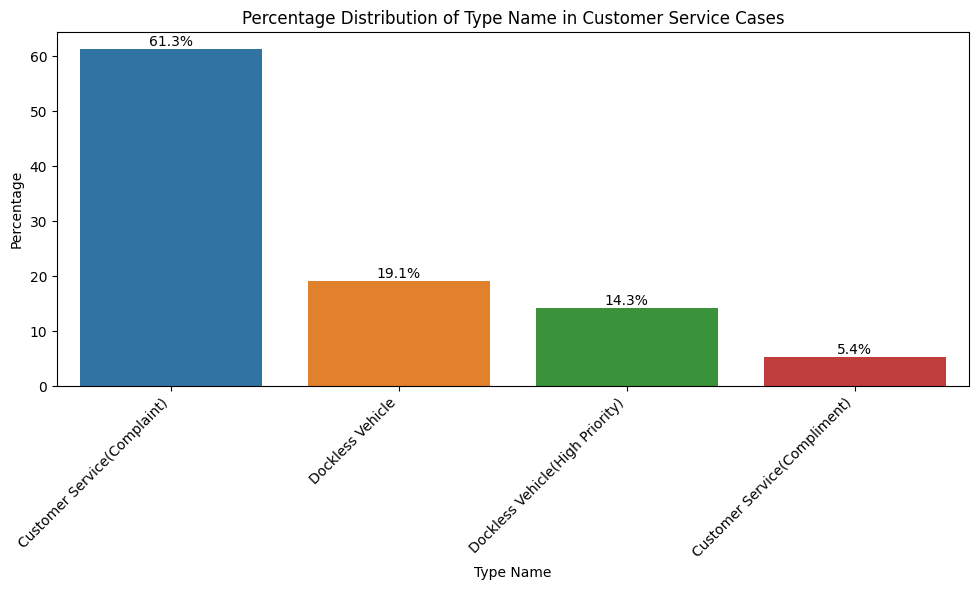

In [17]:

# Calculate value counts as percentages
value_counts_percentage = customer_service_df['TYPENAME'].value_counts(normalize=True) * 100

# Create a bar plot with custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts_percentage.index, y=value_counts_percentage.values, hue=value_counts_percentage.index)

# Annotate each bar with its corresponding percentage value
for index, value in enumerate(value_counts_percentage):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center')

plt.xlabel('Type Name')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Type Name in Customer Service Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend([], frameon=False)  # Hide legend
plt.show()


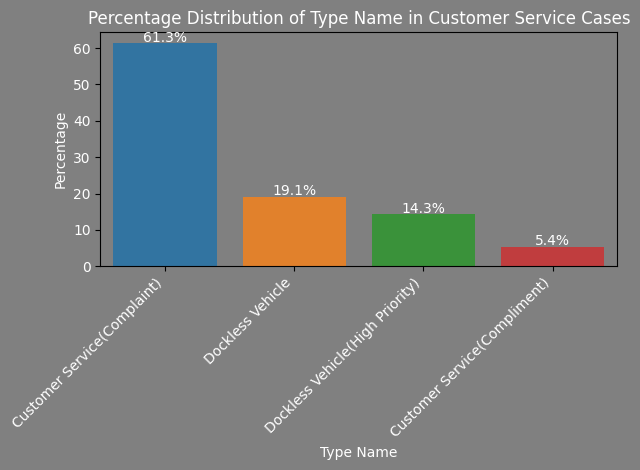

In [18]:

# Set background color
plt.figure(facecolor='grey')

# Calculate value counts as percentages
value_counts_percentage = customer_service_df['TYPENAME'].value_counts(normalize=True) * 100

# Create a bar plot with custom color palette
sns.barplot(x=value_counts_percentage.index, y=value_counts_percentage.values, hue=value_counts_percentage.index)

# Annotate each bar with its corresponding percentage value
for index, value in enumerate(value_counts_percentage):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', color='white')

# Customize axes and tick marks
plt.gca().set_facecolor('grey')  # Set background color of the chart area
plt.xlabel('Type Name', color='white')
plt.ylabel('Percentage', color='white')
plt.title('Percentage Distribution of Type Name in Customer Service Cases', color='white')
plt.xticks(rotation=45, ha='right', color='white')  # Rotate x-axis labels for better readability
plt.yticks(color='white')

# Customize legend
plt.legend([], frameon=False)  # Hide legend

# Show plot
plt.tight_layout()
plt.show()


In [20]:
top_categories = df['Category'].value_counts()
top_categories

Category
Property Maintenance         198332
Solid Waste Services         193882
Animals                      118214
Streets & Infrastructure      38164
Traffic Signals and Signs     28875
Parks                         14298
Health & Sanitation            5927
Information                    5005
Dockless Vehicle               2509
Graffiti                        479
Historic Preservation           376
Name: count, dtype: int64

In [21]:
top_Dept = df['Dept'].value_counts()
top_Dept

Dept
Development Services               199106
Solid Waste Management             196390
Animal Care Services               118462
Public Works                        67242
Parks and Recreation                14873
311                                  4177
Metro Health                         3522
Human Services                       1913
Office of Historic Preservation       376
Name: count, dtype: int64

In [22]:
top_REASONNAME = df['REASONNAME'].value_counts().head(5)
top_REASONNAME

REASONNAME
Code Enforcement      198332
Waste Collection      153218
Field Operations      118214
Miscellaneous          37048
Traffic Operations     29340
Name: count, dtype: int64

In [23]:
top_SourceID = df['SourceID'].value_counts().head(5)
top_SourceID

SourceID
Constituent Call        448138
Code Proactive Calls    117433
311 Mobile App           40490
Name: count, dtype: int64

In [24]:
# 606061
# Group by 'SourceID' and count unique instances of 'CASEID'
count_per_source = df.groupby('SourceID')['CASEID'].nunique()


mobile_app = count_per_source.iloc[0] / 606061
code_proactive_calls = count_per_source.iloc[1] / 606061
constituent_call = count_per_source.iloc[2] / 606061
print(mobile_app, code_proactive_calls, constituent_call)

0.06680845657450322 0.19376432405318936 0.7394272193723074


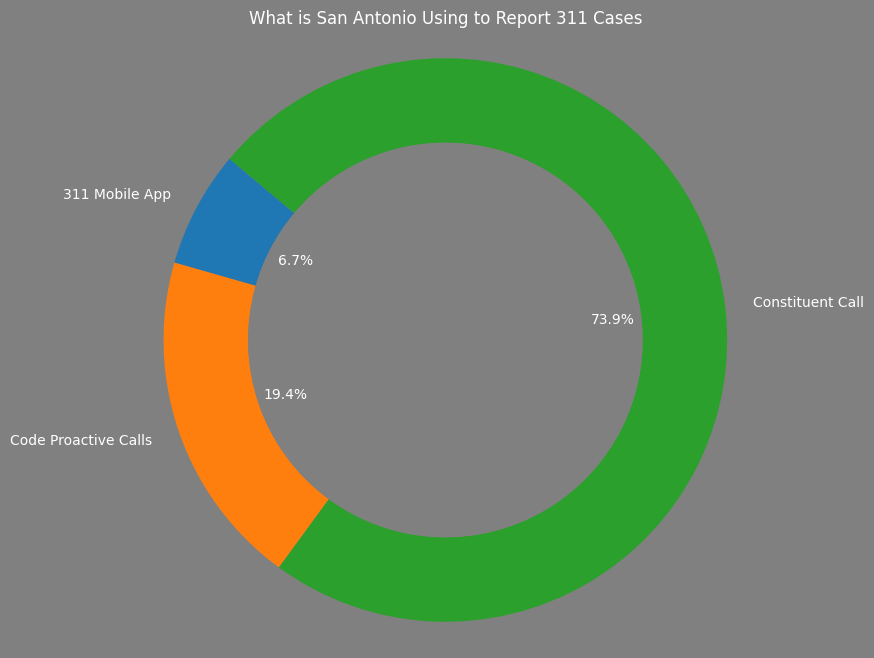

In [25]:
# Calculate proportions
proportions = count_per_source / len(df)

# Create a figure with grey background
plt.figure(figsize=(8, 8), facecolor='grey')

# facecolor='grey
# textprops={'color':'white'}
# color='white'

# Create a donut chart
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), textprops={'color':'white'})
plt.title('What is San Antonio Using to Report 311 Cases', color='white')
plt.axis('equal')
# Draw a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.7, color='grey', linewidth=0)
plt.gca().add_artist(centre_circle)

plt.show()


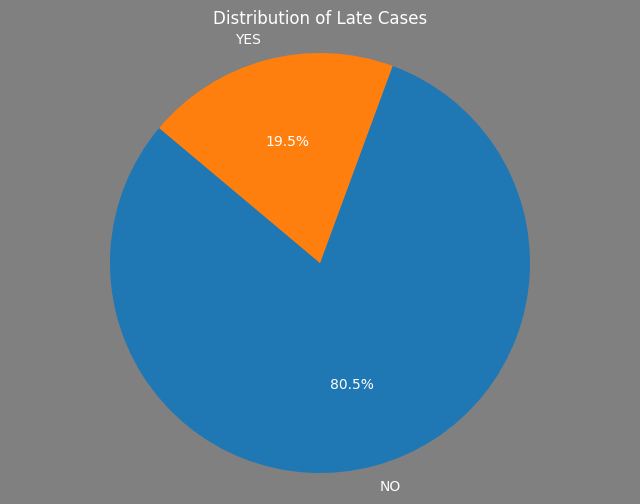

In [26]:
import matplotlib.pyplot as plt

# Count the occurrences of 'Yes' and 'No' in the 'Late (Yes/No)' column
late_counts = df['Late (Yes/No)'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6), facecolor='grey')
plt.pie(late_counts, labels=late_counts.index, autopct='%1.1f%%', startangle=140, textprops={'color':'white'})
plt.title('Distribution of Late Cases', color='white')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
# Group by 'Council District' and count unique instances of 'SourceID'
count_per_district = df.groupby('Council District')['SourceID'].nunique()

# Find the Council District with the maximum count
max_district = count_per_district.idxmax()
max_count = count_per_district.max()

print(f"The Council District with the most uses of SourceID is {max_district} with {max_count} uses.")


The Council District with the most uses of SourceID is 0 with 3 uses.


In [14]:
# Group by 'Council District' and 'SourceID', and count occurrences
count_per_district_source = df.groupby(['Council District', 'SourceID']).size().reset_index(name='Count')

# Find the 'Council District' that used the most of each SourceID
max_calls_per_district = count_per_district_source.groupby('SourceID').apply(lambda x: x.loc[x['Count'].idxmax()])

print("Council District with the most calls for each SourceID:")
print(max_calls_per_district[['SourceID', 'Council District', 'Count']])


Council District with the most calls for each SourceID:
                                  SourceID  Council District  Count
SourceID                                                           
311 Mobile App              311 Mobile App                 1  10018
Code Proactive Calls  Code Proactive Calls                 2  22195
Constituent Call          Constituent Call                 5  70669


C:\Users\mrwoo\AppData\Local\Temp\ipykernel_8248\292565619.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_calls_per_district = count_per_district_source.groupby('SourceID').apply(lambda x: x.loc[x['Count'].idxmax()])


In [16]:
# Loop through each unique combination
for district, source_id in unique_combinations:
    # Filter the DataFrame for the current combination
    filtered_df = df[(df['Council District'] == district) & (df['SourceID'] == source_id)]
    
    # Count occurrences of each Category
    category_counts = filtered_df['Category'].value_counts()
    
    # Find the most common Category
    most_common_category = category_counts.index[0]
    
    # Print the most common Category and its count
    print(f"In Council District {district}, the most common Category for SourceID {source_id} is {most_common_category} with a count of {category_counts.iloc[0]}.")


In Council District 1, the most common Category for SourceID 311 Mobile App is Property Maintenance with a count of 4328.
In Council District 2, the most common Category for SourceID Code Proactive Calls is Property Maintenance with a count of 22195.
In Council District 5, the most common Category for SourceID Constituent Call is Solid Waste Services with a count of 28455.


In [20]:
# Loop through each unique combination
for district, source_id in unique_combinations:
    # Filter the DataFrame for the current combination
    filtered_df = df[(df['Council District'] == district) & (df['SourceID'] == source_id)]
    
    # Count occurrences of each Category and ReasonName
    category_counts = filtered_df['Category'].value_counts()
    reason_counts = filtered_df['TYPENAME'].value_counts()
    
    # Find the most common Category and ReasonName
    most_common_category = category_counts.index[0]
    most_common_reason = reason_counts.index[0]
    
    # Print the most common Category and ReasonName, along with their counts
    print(f"In Council District {district}, the most common Category for SourceID {source_id} is {most_common_category} with a count of {category_counts.iloc[0]}.")
    print(f"The most common TYPENAME for SourceID {source_id} in Council District {district} is {most_common_reason} with a count of {reason_counts.iloc[0]}.\n")


In Council District 1, the most common Category for SourceID 311 Mobile App is Property Maintenance with a count of 4328.
The most common TYPENAME for SourceID 311 Mobile App in Council District 1 is Graffiti (Private Property) with a count of 1016.

In Council District 2, the most common Category for SourceID Code Proactive Calls is Property Maintenance with a count of 22195.
The most common TYPENAME for SourceID Code Proactive Calls in Council District 2 is Overgrown Yard/Trash with a count of 7034.

In Council District 5, the most common Category for SourceID Constituent Call is Solid Waste Services with a count of 28455.
The most common TYPENAME for SourceID Constituent Call in Council District 5 is No Pickup with a count of 10172.



In [35]:
import pandas as pd

# Assuming your DataFrame is named df

# Filter DataFrame for 'Customer Service' in 'REASONNAME'
customer_service_df = df[df['REASONNAME'] == 'Customer Service']

# Count occurrences of each unique 'SourceID'
sourceid_counts = customer_service_df['SourceID'].value_counts()

# Calculate total count of 'SourceID' from 'Customer Service'
total_customer_service_count = sourceid_counts.sum()

# Calculate percentage for each unique 'SourceID'
percentage_sourceid_customer_service = (sourceid_counts / total_customer_service_count) * 100

print("Percentage of each unique 'SourceID' from 'Customer Service':")
print(percentage_sourceid_customer_service)


Percentage of each unique 'SourceID' from 'Customer Service':
SourceID
Constituent Call    73.36971
311 Mobile App      26.63029
Name: count, dtype: float64


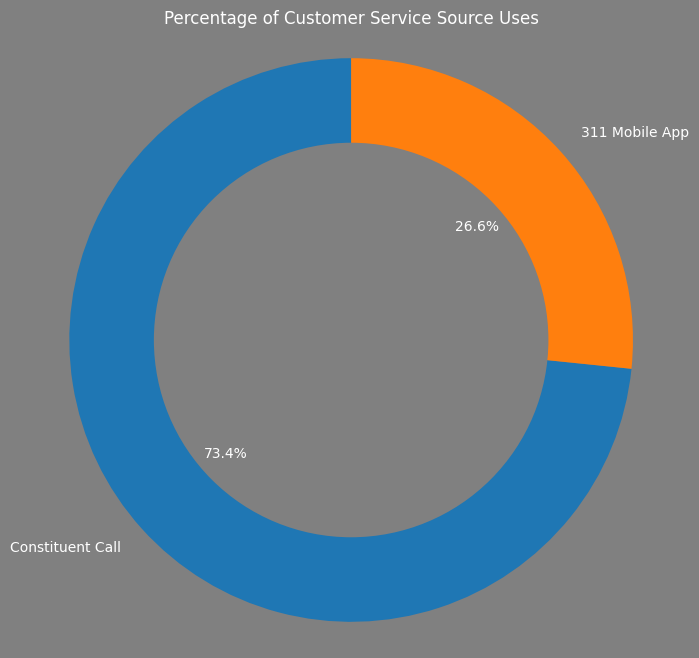

In [42]:
import matplotlib.pyplot as plt

# Assuming percentage_sourceid_customer_service contains the percentages calculated

# Plotting the donut chart
plt.figure(figsize=(8, 8), facecolor='grey')
plt.pie(percentage_sourceid_customer_service, labels=percentage_sourceid_customer_service.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=plt.cm.tab10.colors, textprops={'color':'white'})
plt.title("Percentage of Customer Service Source Uses", color='white')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# facecolor='grey
# textprops={'color':'white'}
# color='white'
# Adding a circle to create the donut shape
centre_circle = plt.Circle((0, 0), 0.7, color='grey', linewidth=0)
plt.gca().add_artist(centre_circle)

plt.show()


In [44]:
import pandas as pd

# Assuming your DataFrame is named df

# Filter DataFrame for 'Customer Service' in 'REASONNAME'
customer_service_df = df[df['REASONNAME'] == 'Customer Service']

# Count occurrences of each unique 'SourceID'
sourceid_counts = customer_service_df['Late (Yes/No)'].value_counts()

# Calculate total count of 'SourceID' from 'Customer Service'
total_customer_service_count = sourceid_counts.sum()

# Calculate percentage for each unique 'SourceID'
percentage_sourceid_customer_service = (sourceid_counts / total_customer_service_count) * 100

print("Percentage of each unique 'Late (Yes/No)' from 'Customer Service':")
print(percentage_sourceid_customer_service)

Percentage of each unique 'Late (Yes/No)' from 'Customer Service':
Late (Yes/No)
YES    63.042321
NO     36.957679
Name: count, dtype: float64


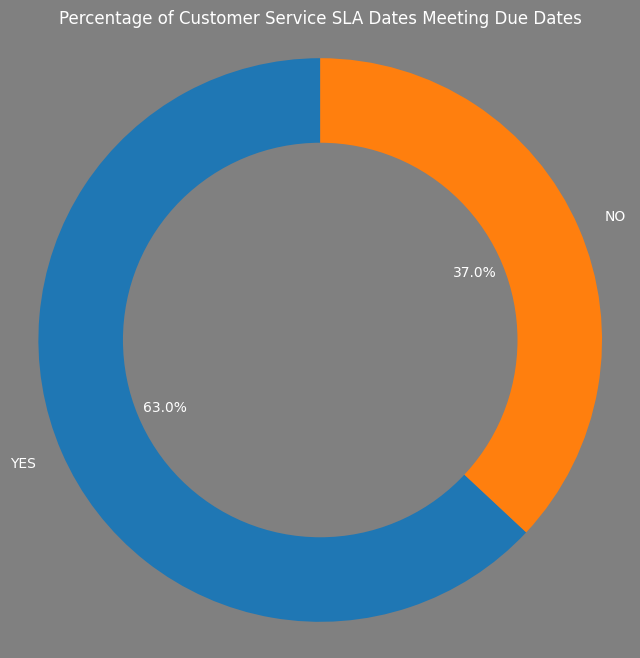

In [47]:
import matplotlib.pyplot as plt

# Assuming percentage_sourceid_customer_service contains the percentages calculated

# Plotting the donut chart
plt.figure(figsize=(8, 8), facecolor='grey')
plt.pie(percentage_sourceid_customer_service, labels=percentage_sourceid_customer_service.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=plt.cm.tab10.colors, textprops={'color':'white'})
plt.title("Percentage of Customer Service SLA Dates Meeting Due Dates", color='white')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# facecolor='grey
# textprops={'color':'white'}
# color='white'
# Adding a circle to create the donut shape
centre_circle = plt.Circle((0, 0), 0.7, color='grey', linewidth=0)
plt.gca().add_artist(centre_circle)

plt.show()


In [49]:
import pandas as pd

# Assuming your DataFrame is named df

# Filter DataFrame for 'Customer Service' in 'REASONNAME'
customer_service_df = df[df['REASONNAME'] == 'Customer Service']

# Count occurrences of each unique 'SourceID'
sourceid_counts = customer_service_df['CaseStatus'].value_counts()

# Calculate total count of 'SourceID' from 'Customer Service'
total_customer_service_count = sourceid_counts.sum()

# Calculate percentage for each unique 'SourceID'
percentage_sourceid_customer_service = (sourceid_counts / total_customer_service_count) * 100

print("Percentage of each unique 'CaseStatus' from 'Customer Service':")
print(percentage_sourceid_customer_service)

Percentage of each unique 'CaseStatus' from 'Customer Service':
CaseStatus
Closed    76.204418
Open      23.795582
Name: count, dtype: float64


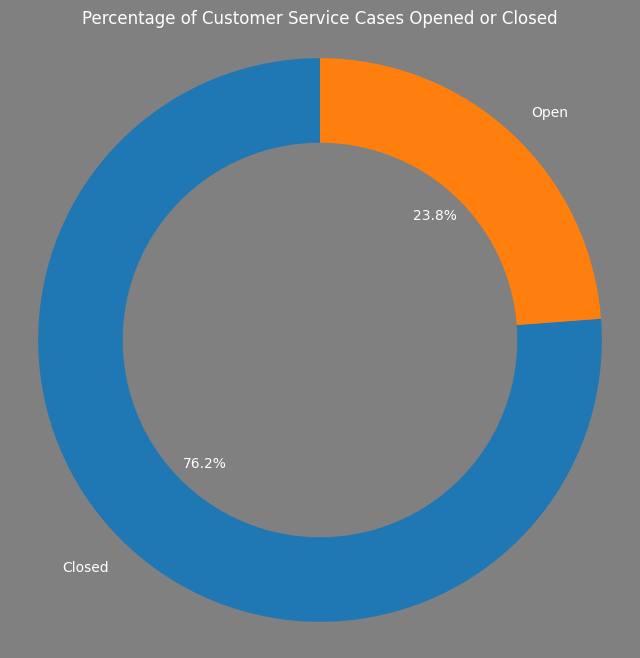

In [52]:
# Plotting the donut chart
plt.figure(figsize=(8, 8), facecolor='grey')
plt.pie(percentage_sourceid_customer_service, labels=percentage_sourceid_customer_service.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=plt.cm.tab10.colors, textprops={'color':'white'})
plt.title("Percentage of Customer Service Cases Opened or Closed", color='white')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# facecolor='grey
# textprops={'color':'white'}
# color='white'
# Adding a circle to create the donut shape
centre_circle = plt.Circle((0, 0), 0.7, color='grey', linewidth=0)
plt.gca().add_artist(centre_circle)

plt.show()